# **Cleaning and preparing the data for model training**

# **Problem Statement**
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing dataset
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#import test data
df_test=  pd.read_csv('test.csv')

In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df = df_train.append(df_test)
df.head()

<ipython-input-109-7298e21ad36d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     369128 non-null  int64  
 1   Product_ID                  369128 non-null  object 
 2   Gender                      369128 non-null  object 
 3   Age                         369128 non-null  object 
 4   Occupation                  369128 non-null  int64  
 5   City_Category               369128 non-null  object 
 6   Stay_In_Current_City_Years  369128 non-null  object 
 7   Marital_Status              369128 non-null  int64  
 8   Product_Category_1          369128 non-null  int64  
 9   Product_Category_2          254594 non-null  float64
 10  Product_Category_3          112413 non-null  float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 36.6+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,3.691280e+05,369128.000000,369128.000000,369128.000000,254594.000000,112413.000000,135528.000000
mean,1.002948e+06,8.086561,0.409712,5.285727,9.851458,12.665626,9300.093700
std,1.727870e+03,6.526245,0.491781,3.738564,5.091558,4.124028,4980.141216
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001447e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.002913e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004406e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# df['Gender']=(df['Gender'] =='M').astype(int)
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
 df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age']  = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0


In [ ]:
df_city_category = pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
df_city_category

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [ ]:
df = pd.concat([df,df_city_category],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head( )

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            114534
Product_Category_3            256715
Purchase                      233600
dtype: int64

In [ ]:
#focus on replacing missing values, don't alter Purchase column as its the testing data
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     43014
14.0    37487
2.0     33394
16.0    29295
15.0    25527
4.0     17468
5.0     17458
6.0     11159
11.0     9571
17.0     9077
13.0     7159
9.0      3921
12.0     3698
10.0     2105
3.0      1947
18.0     1932
7.0       382
Name: Product_Category_2, dtype: int64

In [ ]:
# for discrete values, replace the NaN with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

0

In [ ]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
df['Product_Category_3'].value_counts()

16.0    21797
15.0    18861
14.0    12404
17.0    11344
5.0     11274
8.0      8413
9.0      7948
12.0     6208
13.0     3744
6.0      3175
18.0     3127
4.0      1279
11.0     1236
10.0     1197
3.0       406
Name: Product_Category_3, dtype: int64

In [ ]:
df['Product_Category_3']= df['Product_Category_3'].fillna( df['Product_Category_3'].mode()[0])

In [ ]:
df['Product_Category_3'].isnull().sum()

0

In [ ]:
df['Stay_In_Current_City_Years'].replace('4+','4',inplace=True)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  369128 non-null  object 
 1   Gender                      369128 non-null  int64  
 2   Age                         369128 non-null  int64  
 3   Occupation                  369128 non-null  int64  
 4   Stay_In_Current_City_Years  369128 non-null  object 
 5   Marital_Status              369128 non-null  int64  
 6   Product_Category_1          369128 non-null  int64  
 7   Product_Category_2          369128 non-null  float64
 8   Product_Category_3          369128 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           369128 non-null  uint8  
 11  C                           369128 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 31.7+ MB


In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']= df['B'].astype(int)
df['C']= df['C'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369128 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  369128 non-null  object 
 1   Gender                      369128 non-null  int64  
 2   Age                         369128 non-null  int64  
 3   Occupation                  369128 non-null  int64  
 4   Stay_In_Current_City_Years  369128 non-null  int64  
 5   Marital_Status              369128 non-null  int64  
 6   Product_Category_1          369128 non-null  int64  
 7   Product_Category_2          369128 non-null  float64
 8   Product_Category_3          369128 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           369128 non-null  int64  
 11  C                           369128 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 36.6+ MB


# **Visualizing**

In [ ]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x7e22d41cc430> (for post_execute):


KeyboardInterrupt: ignored

<Axes: xlabel='Age', ylabel='Purchase'>

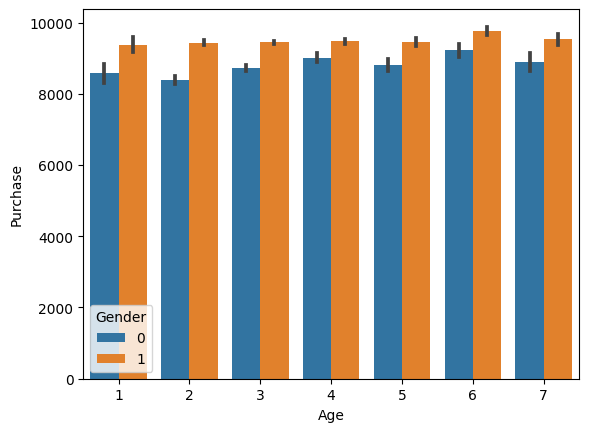

In [ ]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df )

# **Observations**
Men purchased more good as compared to women


<Axes: xlabel='Occupation', ylabel='Purchase'>

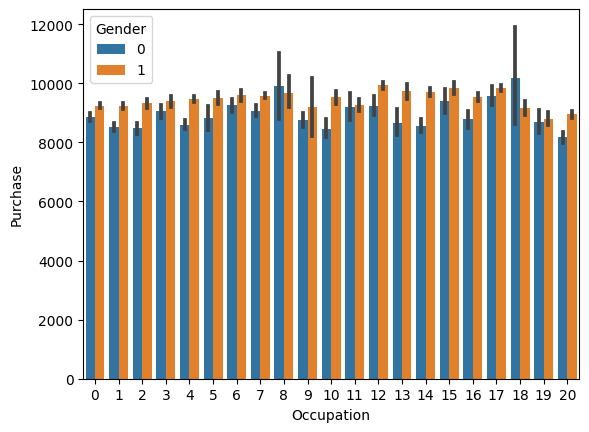

In [ ]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

# **Observations**
1. Only women from occupation 8 and 18 have bought good more than the men of the same occupation
2. Mostly men have bought more goods
3. Women from occupation 18 have spent highest amount of money in the entire dataset

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

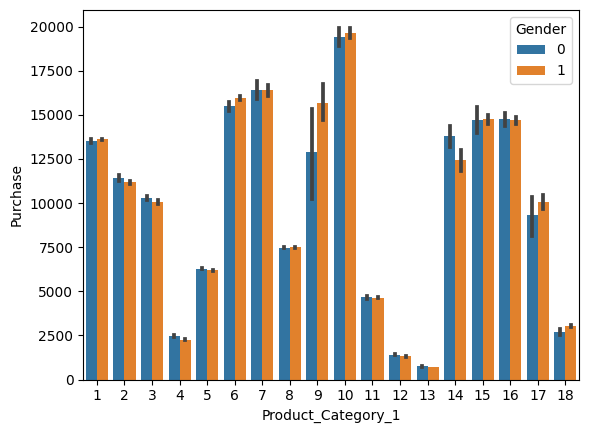

In [ ]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

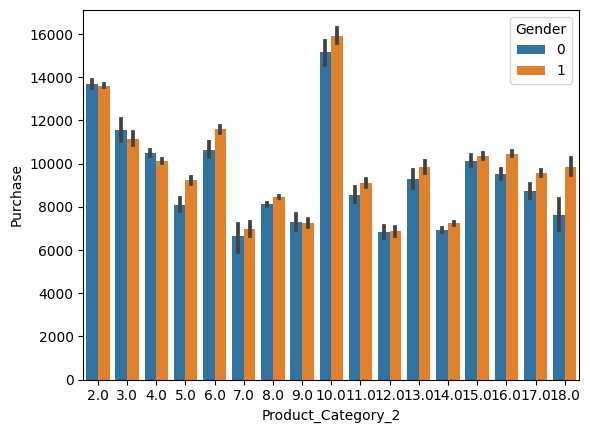

In [ ]:
  sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

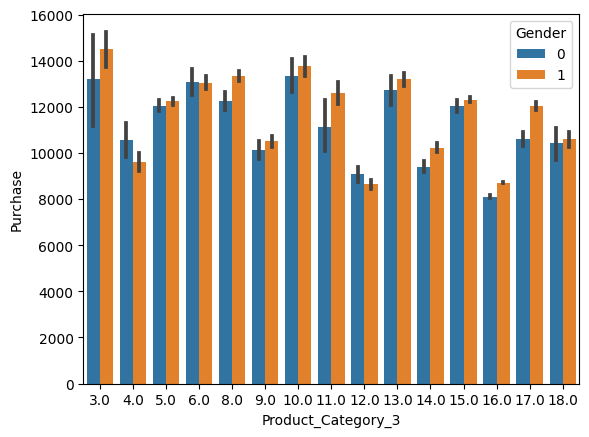

In [ ]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

# **Observation**
Product category 1 has been sold the most


# Feature **Scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [ ]:
df_train.drop('Product_ID',axis=1,inplace=True)
# df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
y= df_train['Purchase']
X = df_train.drop('Purchase',axis=1)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.56889331, -1.09722416, -0.62594014, ..., -1.44967256,
         1.16987569, -0.66841835],
       [ 0.56889331,  1.83982292,  1.36257942, ...,  0.37094952,
         1.16987569, -0.66841835],
       [ 0.56889331, -0.36296239,  1.36257942, ..., -3.63441906,
         1.16987569, -0.66841835],
       ...,
       [ 0.56889331, -0.36296239, -0.62594014, ..., -3.63441906,
         1.16987569, -0.66841835],
       [-1.75779884, -1.09722416, -0.62594014, ...,  0.37094952,
         1.16987569, -0.66841835],
       [-1.75779884, -1.09722416, -0.93186623, ...,  0.37094952,
        -0.85479167, -0.66841835]])

In [ ]:
X_test

array([[-1.75779884,  1.10556115, -0.93186623, ...,  0.37094952,
         1.16987569, -0.66841835],
       [ 0.56889331, -1.09722416, -0.62594014, ...,  0.37094952,
         1.16987569, -0.66841835],
       [ 0.56889331,  0.37129938,  1.05665333, ..., -3.63441906,
        -0.85479167,  1.49606905],
       ...,
       [ 0.56889331, -1.09722416, -0.62594014, ...,  0.37094952,
        -0.85479167, -0.66841835],
       [-1.75779884, -1.09722416, -0.62594014, ..., -1.44967256,
        -0.85479167,  1.49606905],
       [ 0.56889331, -0.36296239,  0.5977642 , ...,  0.37094952,
        -0.85479167, -0.66841835]])

In [ ]:
!git clone https://github.com/ArhamNaeem/Machine-Learning-EDA

Cloning into 'Machine-Learning-EDA'...


In [ ]:

!cp /content/file_path_in_colab/eda_2.ipynb


cp: missing destination file operand after '/content/file_path_in_colab/eda_2.ipynb'
Try 'cp --help' for more information.
